In [292]:
import pandas as pd
from randomForest import randomForest as rf

In [395]:
import copy

#### Testing Around With SnowFall

In [294]:
def addSnow(baseData, snowData):
    endData = copy.deepcopy(baseData)
    
    snowDummy = [0 for i in range(0, len(baseData))]
    endData['SnowFall'] = snowDummy

    snowDays = snowData[snowData['SNOWFALL'] >= 1]
    snowDays = set(snowDays['Unnamed: 0'])

    endData.loc[endData['time'].str[:10].isin(snowDays), 'SnowFall'] = 1

    return endData
    


In [332]:
snow = pd.read_csv('snow/Omega_snow.csv')
base = pd.read_csv('siteData2/Omega_combined.csv')
snow = snow[['Unnamed: 0', 'SNOWFALL']]
snow = snow.dropna()
# base.head()

In [296]:
res = addSnow(base, snow)
res = res.dropna()
# res.info()

In [297]:
# mask = (res['time'] > '2021-01-01')
# res = res.loc[mask]
# # test.head()
# res.info()
test = res[res['SnowFall'] == 1]
test.tail()

,Unnamed: 0,time,time.1,WS0_Sun,WS0_Temp1,WS0_TempF,Elkor Production Meter KwAC,Chint SCA50KTL Inverter - 1 KwAC,Chint SCA50KTL Inverter - 2 KwAC,Chint SCA50KTL Inverter - 3 KwAC,...,Chint SCA50KTL Inverter - 8 Vdc,Chint SCA50KTL Inverter - 9 Vdc,Chint SCA50KTL Inverter - 10 Vdc,timeelapsed,altitude,azimuth,aoi,DC_pred,AC_pred,SnowFall
35792,35792,2022-11-16 15:15:00,2022-11-16 15:15:00,12.887680,36.26035,35.09416,6.394890,0.668540,0.555519,1.008608,...,621.9660,638.0455,536.7741,1.874886,9.484447,231.286917,60.738078,9.664921,6.353348,1
35793,35793,2022-11-16 15:30:00,2022-11-16 15:30:00,9.633125,35.71552,34.93708,4.985166,0.555425,0.410733,0.855594,...,614.1298,633.9017,531.2755,1.874914,7.386086,234.160494,64.000847,7.228897,3.962524,1
35794,35794,2022-11-16 15:45:00,2022-11-16 15:45:00,9.895369,35.47915,34.89772,5.042017,0.557567,0.439711,0.857443,...,613.7703,629.9097,536.4921,1.874943,5.226413,236.960616,67.291650,7.426088,4.156069,1
35795,35795,2022-11-16 16:00:00,2022-11-16 16:00:00,4.810990,35.18208,34.85443,2.275219,0.304153,0.145667,0.552885,...,594.4357,605.9860,512.3929,1.874971,3.033430,239.694045,70.586737,3.612628,0.412686,1
35796,35796,2022-11-16 16:15:00,2022-11-16 16:15:00,0.616758,34.81524,34.71209,0.150562,0.062778,0.000000,0.149611,...,608.6894,622.2968,572.3221,1.875000,0.881674,242.368005,73.823769,0.463460,-2.679282,1


In [298]:
omegaX = res[['WS0_Sun', 'WS0_Temp1', 'WS0_TempF', 'timeelapsed', 'altitude', 'azimuth', 'aoi', 'SnowFall']]
omegaY = res['Elkor Production Meter KwAC']

omegaX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39487 entries, 1 to 40949
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WS0_Sun      39487 non-null  float64
 1   WS0_Temp1    39487 non-null  float64
 2   WS0_TempF    39487 non-null  float64
 3   timeelapsed  39487 non-null  float64
 4   altitude     39487 non-null  float64
 5   azimuth      39487 non-null  float64
 6   aoi          39487 non-null  float64
 7   SnowFall     39487 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 2.7 MB


In [299]:
omegaModel = rf(omegaX, omegaY, 20, .2, .25)

In [300]:
# omegaModel.optimizeModel()

In [301]:
# omegaModel.buildBest()

In [302]:
# print(omegaModel)

In [303]:
# print(omegaModel.bestMse)
# print(omegaModel.bestR2)


In [304]:
import matplotlib.pyplot as plt

res['time'] = pd.to_datetime(res['time'])
res = res.set_index('time')
# res.index
# ACpred=res['AC_pred'].resample('D').sum()
# print(ACpred)

In [305]:
res.head()

,Unnamed: 0,time.1,WS0_Sun,WS0_Temp1,WS0_TempF,Elkor Production Meter KwAC,Chint SCA50KTL Inverter - 1 KwAC,Chint SCA50KTL Inverter - 2 KwAC,Chint SCA50KTL Inverter - 3 KwAC,Chint SCA50KTL Inverter - 4 KwAC,...,Chint SCA50KTL Inverter - 8 Vdc,Chint SCA50KTL Inverter - 9 Vdc,Chint SCA50KTL Inverter - 10 Vdc,timeelapsed,altitude,azimuth,aoi,DC_pred,AC_pred,SnowFall
time,,,,,,,,,,,,,,,,,,,,,
2021-01-01 07:30:00,1,2021-01-01 07:30:00,1.648456,24.60375,26.17599,0.561436,0.099667,0.022778,0.229556,0.229556,...,652.9885,591.9233,605.8812,0.000029,-0.186672,122.367996,72.278134,1.272002,-1.885368,0
2021-01-01 07:45:00,2,2021-01-01 07:45:00,6.075200,24.83837,26.30890,3.220538,0.435889,0.236111,0.659333,0.659111,...,642.2037,646.4118,656.3085,0.000057,1.747938,125.014019,69.271631,4.684524,1.464974,0
2021-01-01 08:00:00,3,2021-01-01 08:00:00,13.090850,25.36635,26.46972,8.226647,0.914000,0.714000,1.113444,1.160111,...,679.9183,681.0267,685.3298,0.000086,3.775454,127.720813,66.165323,10.083958,6.764574,0
2021-01-01 08:15:00,4,2021-01-01 08:15:00,21.648280,26.23335,26.81800,14.226210,1.463333,1.333000,1.686222,1.755667,...,672.2221,700.9260,700.4163,0.000114,5.786725,130.494059,63.053618,16.650026,13.206842,0
2021-01-01 08:30:00,5,2021-01-01 08:30:00,34.125920,27.40173,27.36291,22.974620,2.356333,2.207000,2.555000,2.578222,...,699.6149,713.1367,717.9022,0.000143,7.737786,133.338854,59.976295,26.185589,22.557934,0


In [311]:
ACpred=res['AC_pred'].resample('D').sum().reset_index()
print(ACpred)
Actual = res['Elkor Production Meter KwAC'].resample('D').sum().reset_index()
print(Actual)

          time       AC_pred
0   2021-01-01   4697.895292
1   2021-01-02    234.489956
2   2021-01-03    672.906307
3   2021-01-04    831.179813
4   2021-01-05    775.247696
..         ...           ...
805 2023-03-17   3662.963992
806 2023-03-18   8508.089246
807 2023-03-19  12681.785045
808 2023-03-20  16303.745596
809 2023-03-21   7306.688404

[810 rows x 2 columns]
          time  Elkor Production Meter KwAC
0   2021-01-01                  4550.976726
1   2021-01-02                   134.597450
2   2021-01-03                   366.794058
3   2021-01-04                  1487.080116
4   2021-01-05                  1605.578545
..         ...                          ...
805 2023-03-17                  4097.817175
806 2023-03-18                  8789.361913
807 2023-03-19                 12880.139173
808 2023-03-20                 15637.331801
809 2023-03-21                  7614.165252

[810 rows x 2 columns]


In [334]:
snow.dtypes
# print(snow)
# snow['SNOWFALL'] = snow[snow['SNOWFALL'] >= 1]
snow.loc[snow['SNOWFALL'] >= 1, 'SNOWFALL'] = 1
# endData.loc[endData['time'].str[:10].isin(snowDays), 'SnowFall'] = 1

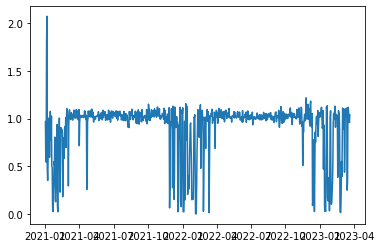

In [335]:
# print(ACpred.dtypes)
plt.plot(ACpred['time'], Actual['Elkor Production Meter KwAC']/ACpred['AC_pred'])

     Unnamed: 0  SNOWFALL
212  2021-08-01       0.0
213  2021-08-02       0.0
214  2021-08-03       0.0
215  2021-08-04       0.0
216  2021-08-05       0.0
..          ...       ...
666  2022-10-29       0.0
667  2022-10-30       0.0
668  2022-10-31       0.0
684  2022-11-16       1.0
688  2022-11-20       0.0

[423 rows x 2 columns]


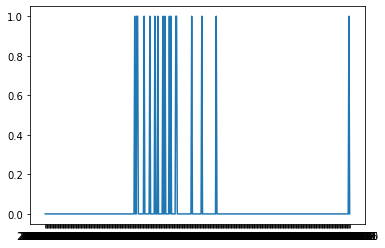

In [337]:
print(snow)
plt.plot(snow['Unnamed: 0'], snow['SNOWFALL'])

### Clean Days Only

In [2]:
import pandas as pd
from randomForest import randomForest as rf
import matplotlib as plt

In [3]:
base = pd.read_csv('siteData2/Omega_combined.csv')
del base['Unnamed: 0']
del base['time.1']
base = base.dropna()
base.head()

,time,WS0_Sun,WS0_Temp1,WS0_TempF,Elkor Production Meter KwAC,Chint SCA50KTL Inverter - 1 KwAC,Chint SCA50KTL Inverter - 2 KwAC,Chint SCA50KTL Inverter - 3 KwAC,Chint SCA50KTL Inverter - 4 KwAC,Chint SCA50KTL Inverter - 5 KwAC,...,Chint SCA50KTL Inverter - 7 Vdc,Chint SCA50KTL Inverter - 8 Vdc,Chint SCA50KTL Inverter - 9 Vdc,Chint SCA50KTL Inverter - 10 Vdc,timeelapsed,altitude,azimuth,aoi,DC_pred,AC_pred
1,2021-01-01 07:30:00,1.648456,24.60375,26.17599,0.561436,0.099667,0.022778,0.229556,0.229556,0.276111,...,616.7617,652.9885,591.9233,605.8812,0.000029,-0.186672,122.367996,72.278134,1.272002,-1.885368
2,2021-01-01 07:45:00,6.075200,24.83837,26.30890,3.220538,0.435889,0.236111,0.659333,0.659111,0.635222,...,651.8253,642.2037,646.4118,656.3085,0.000057,1.747938,125.014019,69.271631,4.684524,1.464974
3,2021-01-01 08:00:00,13.090850,25.36635,26.46972,8.226647,0.914000,0.714000,1.113444,1.160111,1.113333,...,682.7083,679.9183,681.0267,685.3298,0.000086,3.775454,127.720813,66.165323,10.083958,6.764574
4,2021-01-01 08:15:00,21.648280,26.23335,26.81800,14.226210,1.463333,1.333000,1.686222,1.755667,1.662444,...,695.5847,672.2221,700.9260,700.4163,0.000114,5.786725,130.494059,63.053618,16.650026,13.206842
5,2021-01-01 08:30:00,34.125920,27.40173,27.36291,22.974620,2.356333,2.207000,2.555000,2.578222,2.530333,...,712.4380,699.6149,713.1367,717.9022,0.000143,7.737786,133.338854,59.976295,26.185589,22.557934


In [4]:
base['time'] = pd.to_datetime(base['time'])
base = base.set_index('time')

In [5]:
acPred = base['AC_pred'].resample('D').sum().reset_index()
actual = base['Elkor Production Meter KwAC'].resample('D').sum().reset_index()
ratio = acPred['AC_pred']/actual['Elkor Production Meter KwAC']
acPred['actual'] = actual['Elkor Production Meter KwAC']
acPred['ratio'] = acPred['AC_pred']/acPred['actual']
filtered = acPred[acPred['ratio'] < .8]

In [6]:
filtered.shape

(2, 4)

In [7]:
acPred.shape

(810, 4)

In [8]:
omgX = base[['WS0_Sun', 'WS0_Temp1', 'WS0_TempF', 'timeelapsed', 'altitude', 'azimuth', 'aoi', 'DC_pred', 'AC_pred']]
omgY = base['Elkor Production Meter KwAC']


In [9]:
omegaModel = rf(omgX, omgY, 10, .2, .25)

In [10]:
omegaModel.optimizeModel()

  0%|          | 0/10 [00:04<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

In [389]:
omegaModel.buildBest()

In [390]:
print(omegaModel)
print(omegaModel.bestMse)
print(omegaModel.bestR2)

Max Depth: 14.104254097462595
Min Samples per Leaf: 4.441929891148289
Min Samples Split: 4.464533766017249
Number of Estimators: 170.31863935238425

1686.3445112120219
0.9450873963748321


##### Snowshedding Effects

In [11]:
base.head()

,WS0_Sun,WS0_Temp1,WS0_TempF,Elkor Production Meter KwAC,Chint SCA50KTL Inverter - 1 KwAC,Chint SCA50KTL Inverter - 2 KwAC,Chint SCA50KTL Inverter - 3 KwAC,Chint SCA50KTL Inverter - 4 KwAC,Chint SCA50KTL Inverter - 5 KwAC,Chint SCA50KTL Inverter - 6 KwAC,...,Chint SCA50KTL Inverter - 7 Vdc,Chint SCA50KTL Inverter - 8 Vdc,Chint SCA50KTL Inverter - 9 Vdc,Chint SCA50KTL Inverter - 10 Vdc,timeelapsed,altitude,azimuth,aoi,DC_pred,AC_pred
time,,,,,,,,,,,,,,,,,,,,,
2021-01-01 07:30:00,1.648456,24.60375,26.17599,0.561436,0.099667,0.022778,0.229556,0.229556,0.276111,0.099333,...,616.7617,652.9885,591.9233,605.8812,0.000029,-0.186672,122.367996,72.278134,1.272002,-1.885368
2021-01-01 07:45:00,6.075200,24.83837,26.30890,3.220538,0.435889,0.236111,0.659333,0.659111,0.635222,0.435111,...,651.8253,642.2037,646.4118,656.3085,0.000057,1.747938,125.014019,69.271631,4.684524,1.464974
2021-01-01 08:00:00,13.090850,25.36635,26.46972,8.226647,0.914000,0.714000,1.113444,1.160111,1.113333,0.912889,...,682.7083,679.9183,681.0267,685.3298,0.000086,3.775454,127.720813,66.165323,10.083958,6.764574
2021-01-01 08:15:00,21.648280,26.23335,26.81800,14.226210,1.463333,1.333000,1.686222,1.755667,1.662444,1.485667,...,695.5847,672.2221,700.9260,700.4163,0.000114,5.786725,130.494059,63.053618,16.650026,13.206842
2021-01-01 08:30:00,34.125920,27.40173,27.36291,22.974620,2.356333,2.207000,2.555000,2.578222,2.530333,2.330222,...,712.4380,699.6149,713.1367,717.9022,0.000143,7.737786,133.338854,59.976295,26.185589,22.557934


In [12]:
base.shape

(39487, 40)

In [15]:
newBase = base.resample('H').sum()

In [16]:
newBase.head()

,WS0_Sun,WS0_Temp1,WS0_TempF,Elkor Production Meter KwAC,Chint SCA50KTL Inverter - 1 KwAC,Chint SCA50KTL Inverter - 2 KwAC,Chint SCA50KTL Inverter - 3 KwAC,Chint SCA50KTL Inverter - 4 KwAC,Chint SCA50KTL Inverter - 5 KwAC,Chint SCA50KTL Inverter - 6 KwAC,...,Chint SCA50KTL Inverter - 7 Vdc,Chint SCA50KTL Inverter - 8 Vdc,Chint SCA50KTL Inverter - 9 Vdc,Chint SCA50KTL Inverter - 10 Vdc,timeelapsed,altitude,azimuth,aoi,DC_pred,AC_pred
time,,,,,,,,,,,,,,,,,,,,,
2021-01-01 07:00:00,7.723656,49.44212,52.48489,3.781974,0.535556,0.258889,0.888889,0.888667,0.911333,0.534444,...,1268.5870,1295.1922,1238.3351,1262.1897,0.000086,1.561266,247.382015,141.549765,5.956526,-0.420394
2021-01-01 08:00:00,114.800910,107.65754,108.63364,78.048227,8.045221,7.431000,8.866444,9.005000,8.770777,8.016778,...,2816.8822,2767.5395,2819.7884,2828.3031,0.000514,26.908578,527.813326,246.149100,88.081862,73.885254
2021-01-01 09:00:00,1047.860060,144.31653,114.09931,624.439720,67.098449,58.797103,59.030997,65.616659,49.829444,58.468895,...,2991.2214,2951.6587,2991.0235,2972.9763,0.000970,55.134463,575.867688,199.255856,766.490996,732.259637
2021-01-01 10:00:00,1889.319100,216.79030,121.84867,1196.288900,126.323450,117.934010,128.593550,123.715880,94.445890,111.346440,...,2944.4768,2946.8278,3015.3685,2988.3900,0.001427,75.957067,629.109871,159.999769,1363.693525,1309.625984
2021-01-01 11:00:00,646.803600,143.92551,121.89436,482.190400,48.413560,47.725340,48.559440,48.967230,47.710210,47.524220,...,2991.7632,2957.4793,2990.5630,2985.8509,0.001884,87.344726,686.684701,135.516830,486.788806,463.637471
